Head of math_train_data.csv:
  Gender Religion Branch  Roll-1  Roll-2  Roll-3  Math-1 Theory  \
0      M    Hindu     CE     350     288     176             47   
1      F    Hindu    CST      18      23      16             84   
2      F    Hindu   AIML      23       3       8             74   
3      M    Hindu    CST     212     140      81             55   
4      M    Hindu    CST     208     323     195             38   

   Physics Theory  Physics Practical  Java-1 Theory  ...  Java-1 Attendance  \
0              48                 75             50  ...              97.00   
1              83                 81             61  ...              88.79   
2              85                 86             64  ...              97.98   
3              69                 82             56  ...              96.23   
4              59                 74             36  ...              97.92   

   Software Engineering Attendance  Environmental Science Attendance  \
0                    

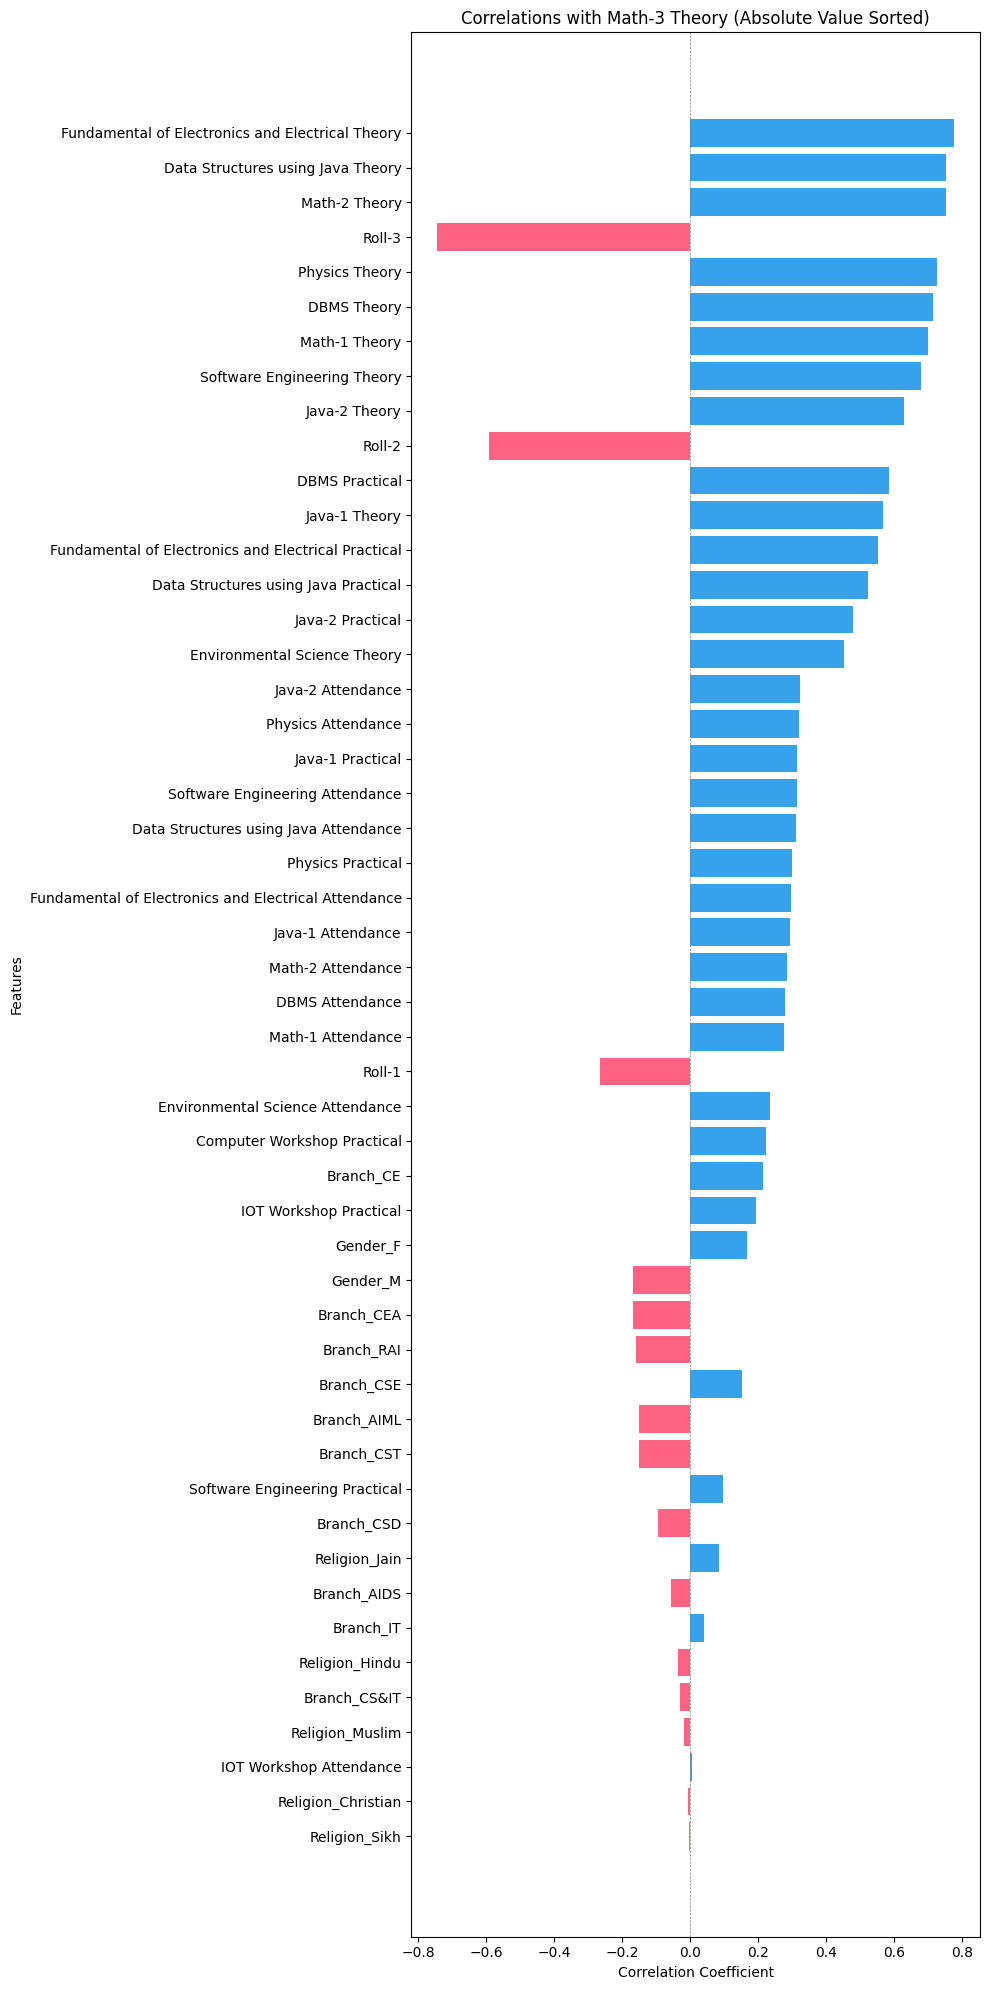

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the math train data
df = pd.read_csv('math_train_data.csv')

# Print the first 5 rows
print("Head of math_train_data.csv:")
print(df.head())

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize a dictionary to store correlations
correlations = {}

# Compute Pearson correlation for numeric columns with Math-3 Theory
for col in numeric_cols:
    if col != 'Math-3 Theory':  # Exclude the target itself
        corr = df[col].corr(df['Math-3 Theory'])
        correlations[col] = corr

# Encode categorical columns for correlation
for col in categorical_cols:
    if col in ['Gender', 'Religion', 'Branch']:
        # One-hot encode categorical columns
        encoded = pd.get_dummies(df[col], prefix=col)
        for encoded_col in encoded.columns:
            corr = encoded[encoded_col].corr(df['Math-3 Theory'])
            correlations[encoded_col] = corr

# Convert Roll-1 to numeric and compute correlation
if 'Roll-1' in df.columns:
    corr = df['Roll-1'].astype(float).corr(df['Math-3 Theory'])
    correlations['Roll-1'] = corr

# Sort correlations by absolute value in descending order
sorted_correlations = dict(sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True))

# Print sorted correlations
print("\nCorrelations with Math-3 Theory (sorted by absolute value):")
for col, corr in sorted_correlations.items():
    print(f"{col}: {corr:.4f}")

# Prepare data for plotting
labels = list(sorted_correlations.keys())
values = list(sorted_correlations.values())

# Create a horizontal bar plot
plt.figure(figsize=(10, max(8, len(labels) * 0.4)))  # Adjust height based on number of features
plt.barh(labels[::-1], values[::-1], color=np.where(np.array(values[::-1]) >= 0, '#36A2EB', '#FF6384'))
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title('Correlations with Math-3 Theory (Absolute Value Sorted)')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()